In [ ]:
"""
README

Section 1: understand the given data sets and to pre-process the data based on life experience and knowledge of electricity.

    For the Tesla battery data sheet, this has more data types to focus on and analyse. In this case the focus was on selecting 
    data types related to price and power factor in order to achieve the energy savings that this project intend to 
    achieve.
    
    The data given are based on the Tesla battery, the time of day is also scaled at half-hourly intervals. The criterion 
    for judging the detection of outliers is data exceeding ±3 times the standard deviation of the median.

Section 2: visualise the data and show the results.

    As the data table contains data only from January to March, month (rather than quarter) was selected as the time span for 
    the cross-sectional comparison. The five data types 'Raise 6sec Price ($/MWh)', 'Raise 60sec Price ($/MWh)', 
    'Raise 5min Price ($/MWh)', 'Power Factor', 'Energy Price ($/MWh)' are also visualised and presented in line charts. 
    The five data types are also visualised and presented in a discounted form. The last graph was chosen to combine and 
    average the data from January to March in order to obtain a uniform and generalised result.

Section 3: data analysis based on graphs.

    By looking at the trends in the line graphs of the last four charts, it can be seen that the highest energy prices during 
    the three months were between 6.30pm and 7pm. Conversely, energy prices are relatively lowest between 7am and 11am. 
    Looking at the first four charts, it is easy to find out that around 11am is the turning point in the range of energy 
    prices throughout the day. The last graph shows that the trend in power factor and energy prices are inversely 
    proportional, so the change in one of these two figures could be possibly predicted by observing how the other one changes 
    in a certain period. As a measure of the efficiency of electrical equipment, the higher the power factor, the more 
    efficient the equipment is at this time, and therefore the cheaper the energy prices are at this time, suggesting that 
    users are scheduling most of their production tasks at this time period. 
    
    The results of this analysis are very useful for maximising the efficiency of Tesla's battery operation and achieving 
    energy savings.     
    
"""

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#detect and process abnormal values
def outliners(data,col,scale=3):
    def box_plot_outliners(data_ser,box_scale):
        IQR=box_scale*(data_ser.quantile(0.75)-data_ser.quantile(0.25))
        val_low=data_ser.quantile(0.25)-IQR
        val_up=data_ser.quantile(0.75)+IQR
        rule_low=(data_ser<val_low)
        rule_up=(data_ser>val_up)
        return rule_low,rule_up,val_low,val_up
    data_n=data.copy()
    data_series=data_n[col]
    rule_low,rule_up,val_low,val_up=box_plot_outliners(data_series,box_scale=scale)
    data_n[col].loc[rule_up]=val_up
    data_n[col].loc[rule_low]=val_low
    return data_n

In [4]:
#read csv file
df=pd.read_csv("C:\\Users\\dell\\OneDrive\Desktop\\data visualization\\Tesla Battery.csv")
#reformat date
df['datetime']=pd.to_datetime(df['Measurement time'].str[:10]+' '+df['Measurement time'].str[11:19])
df
columns=['datetime','Raise 6sec Price ($/MWh)','Raise 60sec Price ($/MWh)','Raise 5min Price ($/MWh)']
df1=df[columns]
#process abnormal values
df1=outliners(df1,'Raise 6sec Price ($/MWh)',scale=3)
df1=outliners(df1,'Raise 60sec Price ($/MWh)',scale=3)
df1=outliners(df1,'Raise 5min Price ($/MWh)',scale=3)
#set index
df1=df1.set_index('datetime')
df1_half_hour=pd.DataFrame(df1.resample(rule = '0.5H').mean()) 
#as for 'Raise 6sec Price ($/MWh)' 'Raise 60sec Price ($/MWh)' 'Raise 5min Price ($/MWh)', average the data at the minute level by half an hour
df1_half_hour

,Raise 6sec Price ($/MWh),Raise 60sec Price ($/MWh),Raise 5min Price ($/MWh)
datetime,,,
2021-01-01 00:00:00,1.730000,1.566667,0.870000
2021-01-01 00:30:00,1.515000,1.545000,0.870000
2021-01-01 01:00:00,1.566667,1.643333,0.870000
2021-01-01 01:30:00,1.690000,1.490000,0.870000
2021-01-01 02:00:00,1.650000,1.588333,0.871667
...,...,...,...
2021-03-10 22:00:00,6.025000,5.000000,0.870000
2021-03-10 22:30:00,4.091667,5.000000,0.870000
2021-03-10 23:00:00,3.068333,4.991667,0.870000


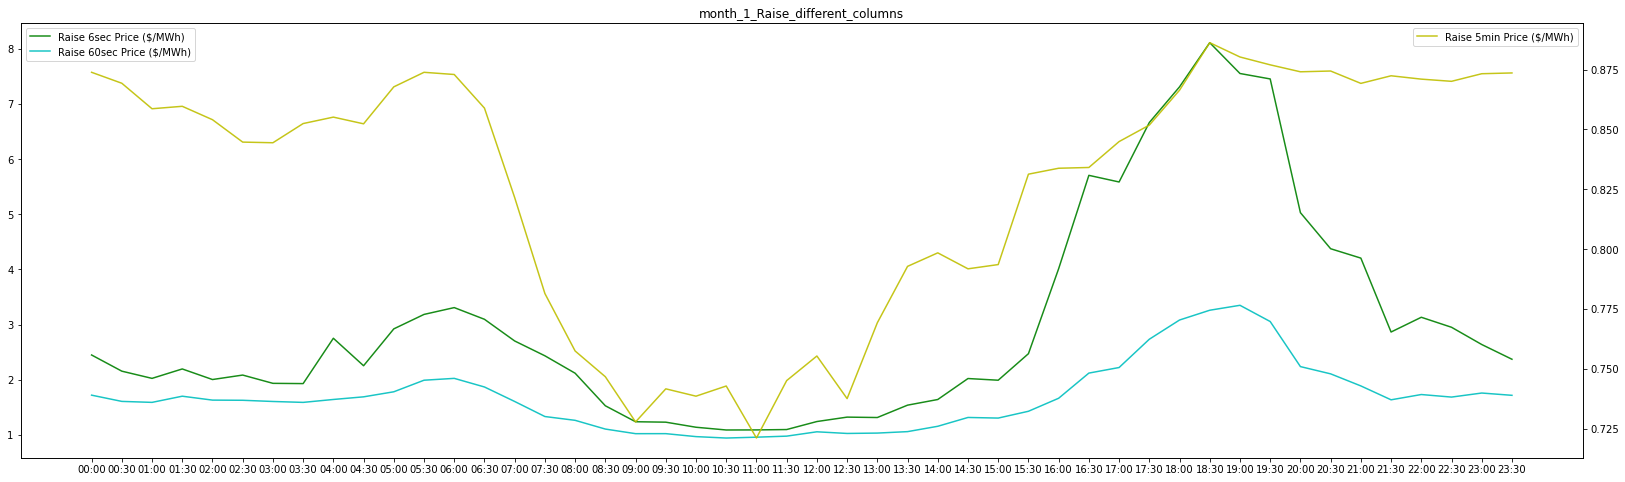

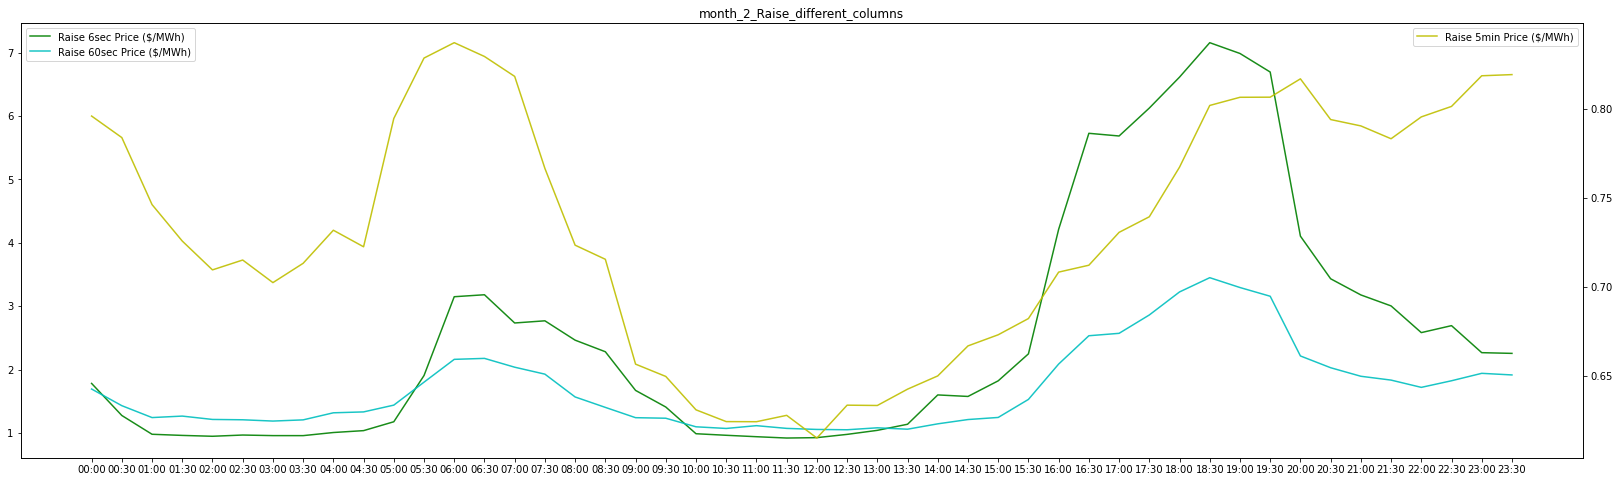

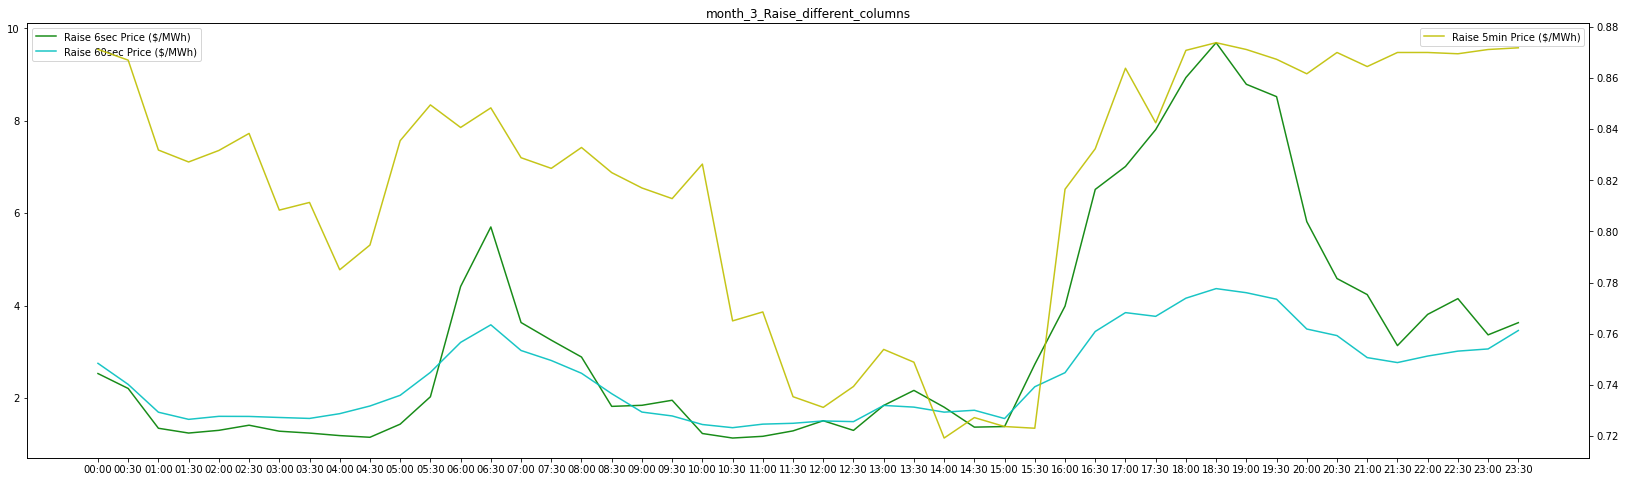

In [22]:
#add time and date label
df1_half_hour['month']=df1_half_hour.index.map(lambda x: x.month)
#half an hour label
df1_half_hour['half_hour']=df1_half_hour.index.strftime('%H:%M')

#generate diagrams
for i in range(1,4):
    #differ from month 1 to month 3
    data=df1_half_hour[df1_half_hour.month==i] 
    data_hour_1=data['Raise 6sec Price ($/MWh)'].groupby(data['half_hour']).mean()
    data_hour_2=data['Raise 60sec Price ($/MWh)'].groupby(data['half_hour']).mean()
    data_hour_3=data['Raise 5min Price ($/MWh)'].groupby(data['half_hour']).mean()
    fig, ax1 = plt.subplots(figsize=(28,8))
    ax2 = ax1.twinx()
    ax1.plot(data_hour_1,label='Raise 6sec Price ($/MWh)', color='g', alpha=0.9)
    ax1.plot(data_hour_2, label='Raise 60sec Price ($/MWh)', color='c', alpha=0.9)
    ax2.plot(data_hour_3, label='Raise 5min Price ($/MWh)', color='y', alpha=0.9)
    plt.title("month_{}_Raise_different_columns".format(i))
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.savefig("month_{}_Raise_different_columns".format(i),dpi=400)
    plt.show()    

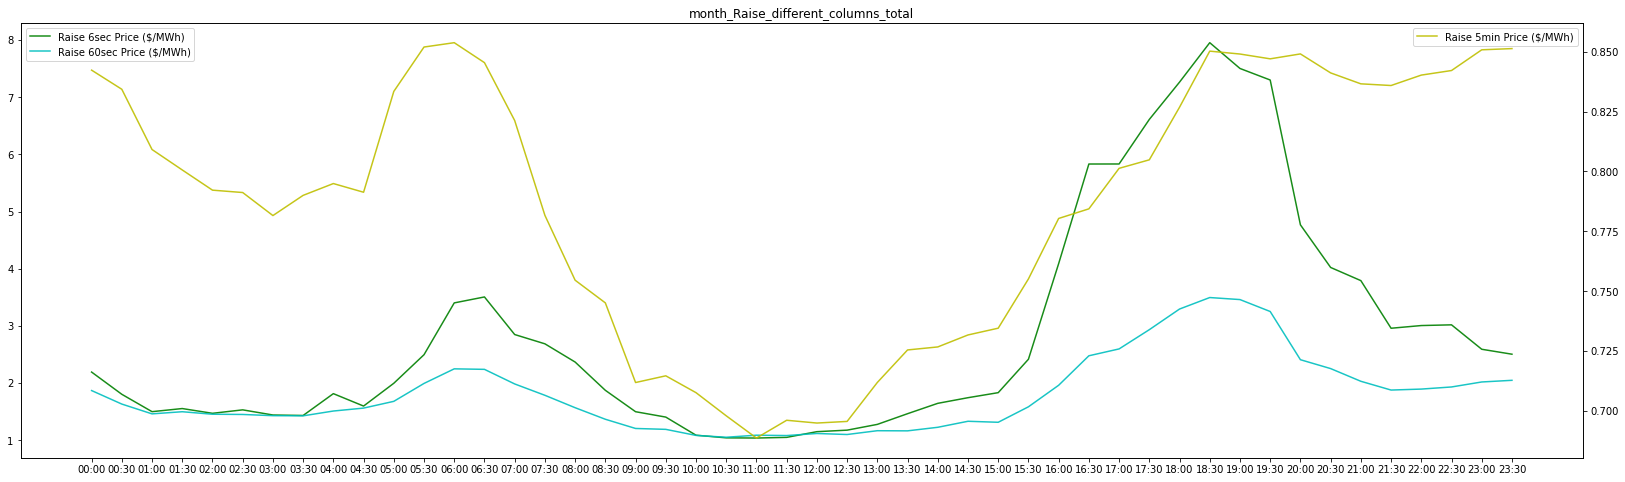

In [5]:
#add time and date label
df1_half_hour['month']=df1_half_hour.index.map(lambda x: x.month)
df1_half_hour['half_hour']=df1_half_hour.index.strftime('%H:%M') #半小时标签

#generate diagrams
data_hour_1=df1_half_hour['Raise 6sec Price ($/MWh)'].groupby(df1_half_hour['half_hour']).mean()
data_hour_2=df1_half_hour['Raise 60sec Price ($/MWh)'].groupby(df1_half_hour['half_hour']).mean()
data_hour_3=df1_half_hour['Raise 5min Price ($/MWh)'].groupby(df1_half_hour['half_hour']).mean()
fig, ax1 = plt.subplots(figsize=(28,8))
ax2 = ax1.twinx()
ax1.plot(data_hour_1,label='Raise 6sec Price ($/MWh)', color='g', alpha=0.9)
ax1.plot(data_hour_2, label='Raise 60sec Price ($/MWh)', color='c', alpha=0.9)
ax2.plot(data_hour_3, label='Raise 5min Price ($/MWh)', color='y', alpha=0.9)
plt.title("month_Raise_different_columns_total")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.savefig("month_Raise_different_columns_total",dpi=400)
plt.show()    

In [7]:
#generate the second diagram
columns2=['datetime','Power Factor','Energy Price ($/MWh)']
df2=df[columns2]
#process the abnormal values
df2=outliners(df2,'Power Factor',scale=3)
df2=outliners(df2,'Energy Price ($/MWh)',scale=3)

#format date time and set index
df2=df2.set_index('datetime')
df2_half_hour=pd.DataFrame(df2.resample(rule = '0.5H').mean()).dropna()
#as for 'Power Factor','Energy Price ($/MWh)', average the data at the minute level by half an hour
df2_half_hour

,Power Factor,Energy Price ($/MWh)
datetime,,
2021-01-01 00:00:00,0.069667,36.528333
2021-01-01 00:30:00,0.069000,39.008333
2021-01-01 01:00:00,0.070000,34.066667
2021-01-01 01:30:00,0.068667,33.916667
2021-01-01 02:00:00,0.070000,28.845000
...,...,...
2021-03-10 21:30:00,0.060000,37.755000
2021-03-10 22:00:00,0.072333,47.928333
2021-03-10 22:30:00,0.090333,38.310000


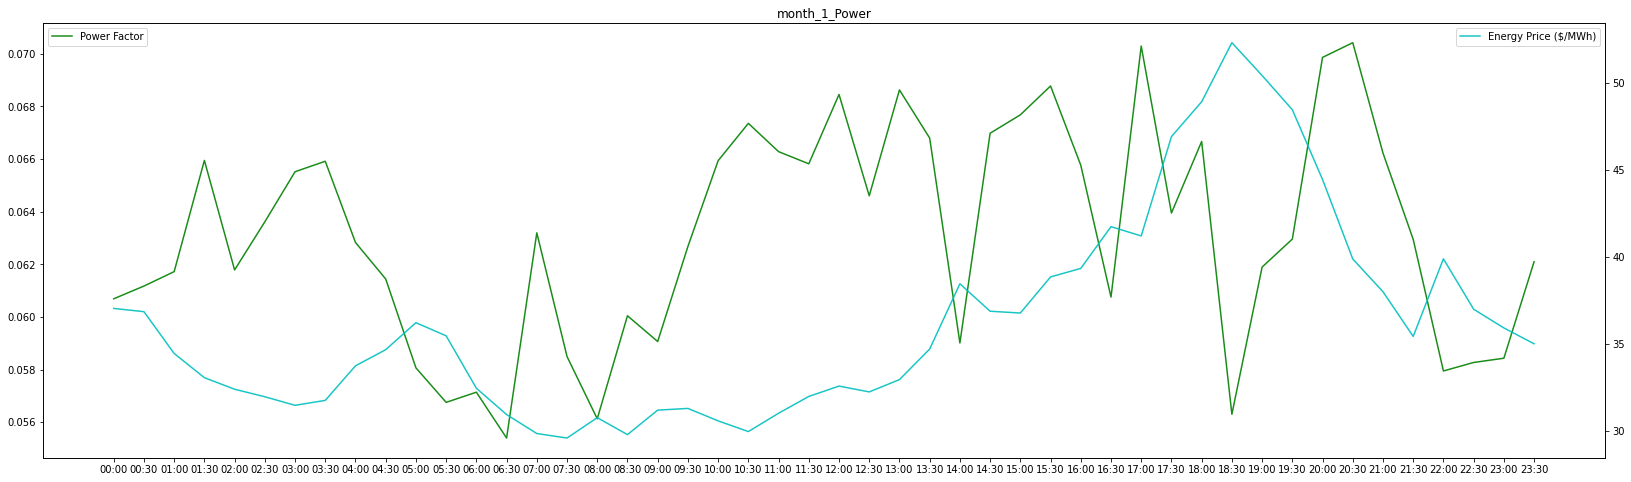

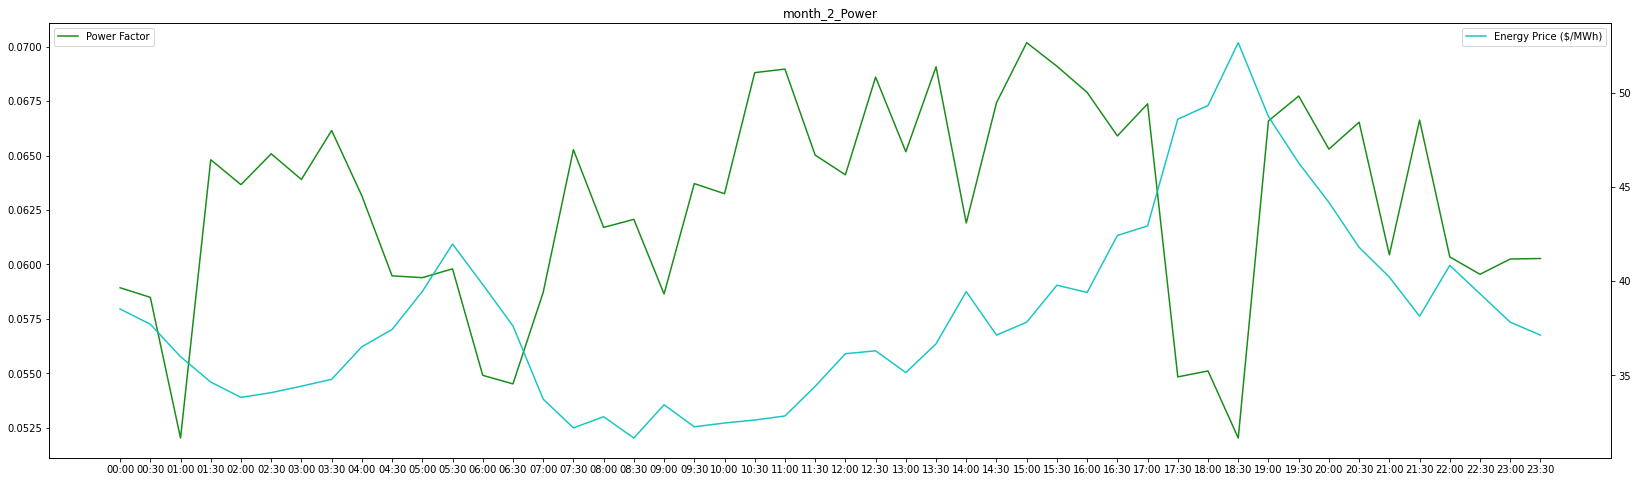

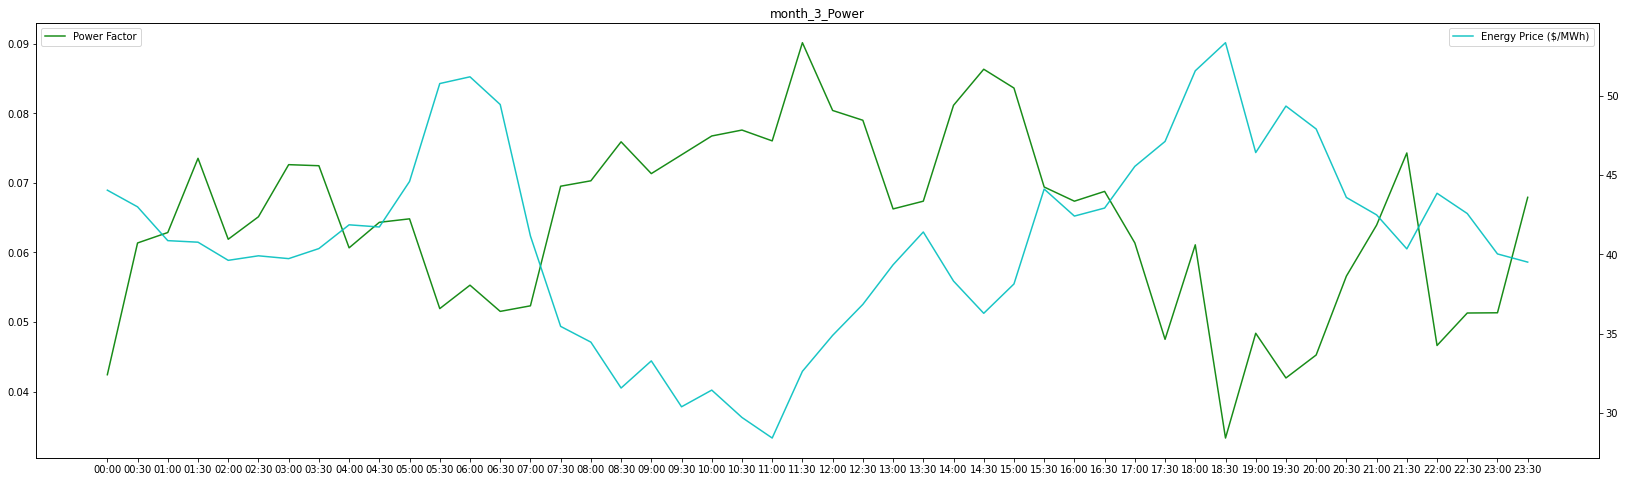

In [8]:
#add time and date label
df2_half_hour['month']=df2_half_hour.index.map(lambda x: x.month)
#half an hour label
df2_half_hour['half_hour']=df2_half_hour.index.strftime('%H:%M')
#generate diagram
for i in range(1,4):
    #differ from month 1 to month 3
    data=df2_half_hour[df2_half_hour.month==i] 
    data_hour_1=data['Power Factor'].groupby(data['half_hour']).mean()
    data_hour_2=data['Energy Price ($/MWh)'].groupby(data['half_hour']).mean()

    fig, ax1 = plt.subplots(figsize=(28,8))
    ax2 = ax1.twinx()
    ax1.plot(data_hour_1,label='Power Factor', color='g', alpha=0.9)
    ax2.plot(data_hour_2, label='Energy Price ($/MWh)', color='c', alpha=0.9)

    plt.title("month_{}_Power".format(i))
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.savefig("month_{}_Power".format(i),dpi=400)
    plt.show()  

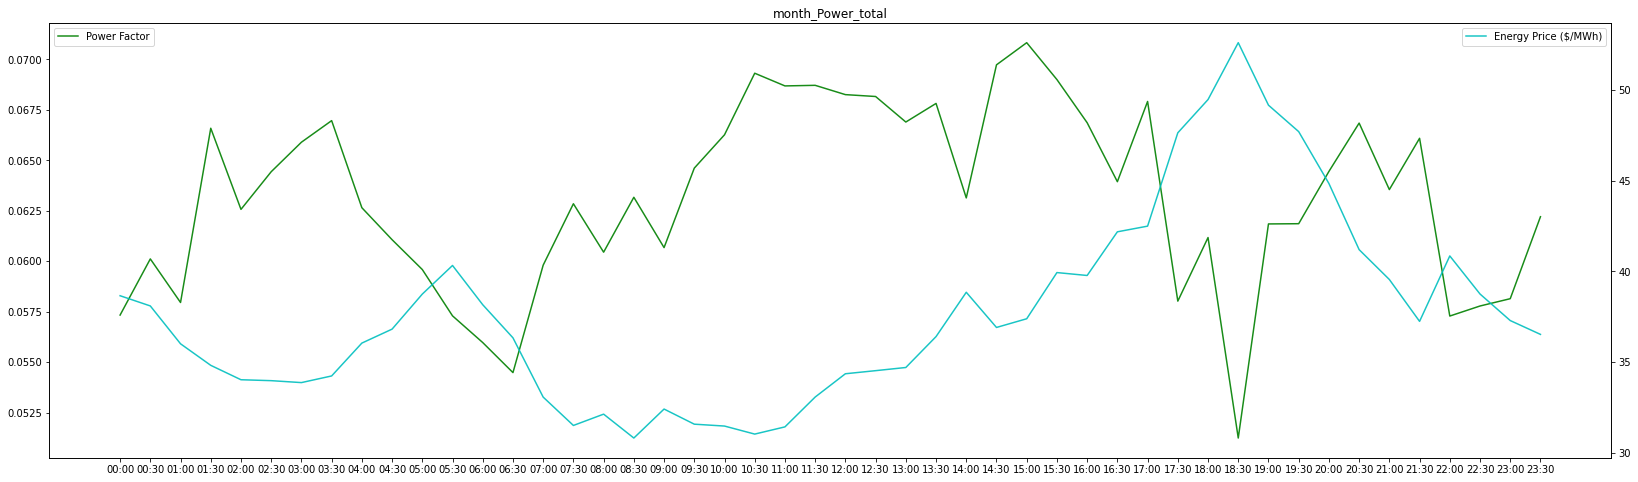

In [9]:
#add time and date label
df2_half_hour['month']=df2_half_hour.index.map(lambda x: x.month)
#half an hour label
df2_half_hour['half_hour']=df2_half_hour.index.strftime('%H:%M')
#generate diagram

data=df2_half_hour
data_hour_1=data['Power Factor'].groupby(data['half_hour']).mean()
data_hour_2=data['Energy Price ($/MWh)'].groupby(data['half_hour']).mean()

fig, ax1 = plt.subplots(figsize=(28,8))
ax2 = ax1.twinx()
ax1.plot(data_hour_1,label='Power Factor', color='g', alpha=0.9)
ax2.plot(data_hour_2, label='Energy Price ($/MWh)', color='c', alpha=0.9)

plt.title("month_Power_total")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.savefig("month_Power_total",dpi=400)
plt.show() 